<a href="https://colab.research.google.com/github/BabyFace-Creation/PCVK-Genap-20-21/blob/main/Jobsheet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import argparse
import glob

In [ ]:
def adjust_gamma(image, gamma):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv.LUT(image, table)

Masukkan Nilai Gamma : 2


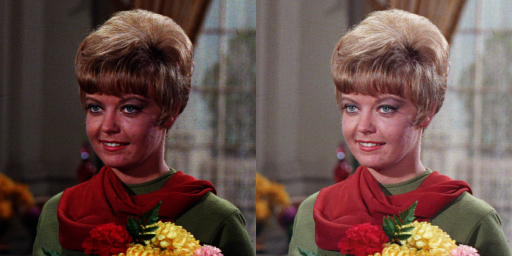

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')

try :
  gammaBrightness = int(input('Masukkan Nilai Gamma : '))
except ValueError :
  print('Number Error')

adjusted = adjust_gamma(original, gamma=gammaBrightness)
final_frame = cv.hconcat((original, adjusted))
cv2_imshow(final_frame)
	

Masukkan Nilai Bit Depth : 2


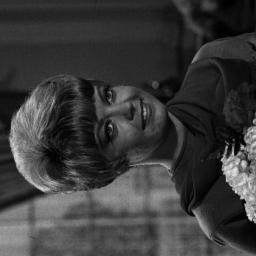

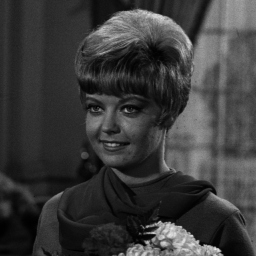

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

try :
  bit = int(input('Masukkan Nilai Bit Depth : '))
except ValueError :
  print('Number Error')

level = 255/(2**bit)-1

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)
    

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(depth_image)
cv2_imshow(original)



In [ ]:
def PSNR(img, max):
  frs_image = img[0]
  for x in range(1, max):
    if(x == 0):
      continue
    frs_image = frs_image - img[x]
  
  mse = np.mean((frs_image)**2)
  if(mse==0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

In [ ]:
try :
  averagePct = int(input('Masukkan Nilai Bit Depth : '))
except ValueError :
  print('Number Error')

cv_img = [] 
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/Noises/*.jpg'): 
  n= cv.imread(img) 
  cv_img.append(n)

result = (cv_img, averagePct)
print (result)

Masukkan Nilai Bit Depth : 5
([array([[[26,  7, 26],
        [36, 16, 35],
        [37, 15, 33],
        ...,
        [11, 12, 38],
        [30, 31, 57],
        [ 5,  7, 31]],

       [[24,  7, 21],
        [35, 16, 31],
        [54, 33, 48],
        ...,
        [ 2,  0, 15],
        [51, 45, 62],
        [42, 37, 52]],

       [[36, 19, 28],
        [64, 47, 56],
        [65, 45, 57],
        ...,
        [32, 14, 15],
        [70, 50, 49],
        [57, 37, 36]],

       ...,

       [[26, 10, 28],
        [40, 24, 42],
        [32, 18, 36],
        ...,
        [28, 27, 29],
        [18, 14, 19],
        [25, 21, 26]],

       [[31, 14, 35],
        [30, 13, 34],
        [26,  9, 30],
        ...,
        [52, 41, 49],
        [47, 33, 44],
        [40, 26, 38]],

       [[40, 22, 45],
        [30, 12, 35],
        [27,  9, 32],
        ...,
        [26, 10, 21],
        [59, 40, 55],
        [46, 27, 42]]], dtype=uint8), array([[[ 4, 13, 10],
        [47, 54, 51],
        [58, 56,

In [ ]:
cv_img = [] 
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/Noises/*.jpg'): 
  n= cv.imread(img) 
  cv_img.append(n)



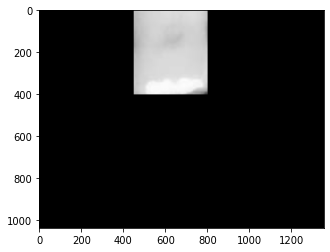

In [ ]:
im = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/teeth.jpg')

plt.imshow(im)
mask = np.zeros(im.shape[:2], dtype="uint8")
cv.rectangle(mask, (450, 0), (800, 400), 255, -1)
plt.imshow(mask)
masked = cv.bitwise_and(im, im, mask=mask)
plt.imshow(masked)

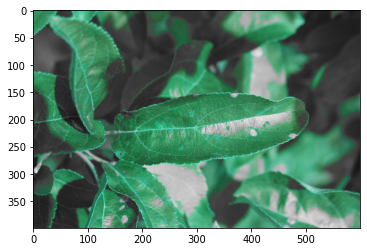

In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/leave.png')

gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray = cv.merge([gray, gray, gray])
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)
lower = np.array([35, 90, 88])
upper = np.array([179, 255, 255])
mask = cv.inRange(hsv, lower, upper)
colored_output = cv.bitwise_and(original, original, mask=mask)
gray_output = cv.bitwise_and(gray, gray, mask=255-mask)
result = cv.add(colored_output, gray_output)

plt.imshow(result)